In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
clean_data_dir = os.path.join('..','data_files','clean_data')
lake_colors_d = {'Lake Superior':'blue',
                 'Lake Michigan':'red',
                 'Lake Huron':'green',
                 'Lake Erie':'purple',
                 'Lake Ontario':'orange'}

In [3]:
lake_stats = pd.read_csv(os.path.join(clean_data_dir,'lake_stats.csv'),index_col=0)
lakes = lake_stats.index.tolist()
lake_ls = ['Lake '+ x for x in lakes]
lake_ls

['Lake Superior', 'Lake Michigan', 'Lake Huron', 'Lake Erie', 'Lake Ontario']

In [4]:
ice_coverage = pd.read_csv(os.path.join('..','data_files','ice_data','ice_coverage.csv'),index_col='Date')
ice_coverage

,Unnamed: 0,Lake Erie,Lake Huron,Lake Michigan,Lake Ontario,Lake Superior,Weekday,Year,Month,Day
Date,,,,,,,,,,
1972-12-19,0,NaN,NaN,NaN,NaN,0.00,Tuesday,1972,12,19
1972-12-20,1,0.0,25.26,9.21,0.61,16.62,Wednesday,1972,12,20
1972-12-28,2,0.0,12.65,12.09,2.98,9.35,Thursday,1972,12,28
1973-01-02,3,3.4,22.00,6.53,2.80,13.03,Tuesday,1973,1,2
1973-01-09,4,25.4,31.30,21.55,21.40,29.69,Tuesday,1973,1,9
...,...,...,...,...,...,...,...,...,...,...
2016-05-01,2519,0.0,0.00,0.00,0.00,0.55,Sunday,2016,5,1
2016-05-02,2520,0.0,0.00,0.00,0.00,0.24,Monday,2016,5,2
2016-05-03,2521,0.0,0.00,0.00,0.00,0.24,Tuesday,2016,5,3


In [38]:
DTX32_erie_df = pd.read_csv(os.path.join('..','data_files','api_calls','Erie_22-27_GSOM.csv'),index_col='datatype')
DX32_erie_df = DTX32_erie_df[['date','value']].loc['DX32',["date","value"]]
DX32_erie_df
# This is the all values with DT32

DX32_erie_df['date'].str.split("-")

# DT32_erie_df["year"]= new[0]
# DT32_erie_df["month"]= new[1]

datatype
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
DX32    [1995, 01, 01T00:00:00]
                 ...           
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
DX32    [1999, 05, 01T00:00:00]
Name: date, Length: 22233, dtype: object

In [39]:
median_winter_month =[]
year_list=['1996','1997','1998','1999','2000']
my_list = ['01','02','03','04','05']
for y in year_list:
    for i in my_list:
        year_month_df = pd.DataFrame(DT32_erie_df['date'].apply(lambda row: row.split('-')[:2]))
        year_month_df['year'] = year_month_df['date'].apply(lambda row: row[0])
        year_month_df['month'] = year_month_df['date'].apply(lambda row: row[1])
        year_month_df = year_month_df.drop('date', axis=1)
        year_month_df['value']= DT32_erie_df['value']
        months_years = year_month_df.loc[(year_month_df["year"] == y ) & (year_month_df['month'] == i )]["value"].mean()
        # year_month_df['date'].apply(lambda row: dt.datetime(year=int(row[0]), month=int(row[1])))
        median_winter_month.append(months_years)
mean_1996 = median_winter_month[0:5]
mean_1997 = median_winter_month[5:10]
mean_1998 = median_winter_month[10:15]
mean_1999 = median_winter_month[15:20]
mean_2000 = median_winter_month[20:25]

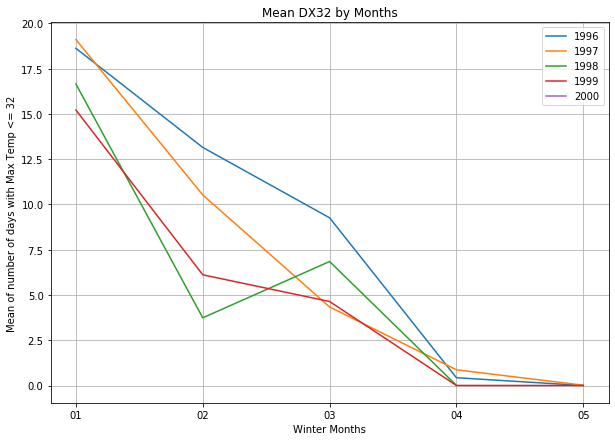

In [43]:
plt.figure(figsize=(10,7))
plt.title('Mean DX32 by Months')
plt.plot(my_list,mean_1996,label= "1996")
plt.plot(my_list,mean_1997, label= "1997")
plt.plot(my_list,mean_1998,label= "1998")
plt.plot(my_list,mean_1999,label= "1999")
plt.plot(my_list,mean_2000,label= "2000")
plt.xlabel('Winter Months')
plt.ylabel('Mean of number of days with Max Temp <= 32')
plt.legend()
plt.grid()
plt.show()

# go with 1992 - 1996 